In [ ]:
#Test #4:

# For this task you will train a classifier on the bbc news text archive
# Your classifier should be trained on the 6 categories shown below, and your final layer
# should be as shown -- Dense layer with 6 neurons and softmax activation.
# Your model will be tested against unseen sentences and you will be scored on whether they
# are correctly classified or not. 

import csv
import tensorflow as tf
import numpy as np
import urllib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# def solution_model():
# url = 'https://storage.googleapis.com/download.tensorflow.org/data/bbc-text.csv'
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv'
urllib.request.urlretrieve(url, 'bbc-text.csv')

# DO NOT CHANGE THE VALUES OF THESE CONSTANTS OR THE TESTS MAY FAIL
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
train_size = 2000
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

with open("bbc-text.csv", 'r') as csvfile:
    # YOUR CODE HERE
    csvreader = csv.reader(csvfile, delimiter=',')
    next(csvreader)
    for row in csvreader:
      labels.append(row[0])
      sentence = row[1]
      for word in stopwords:
        token = " " + word + " "
        sentence = sentence.replace(token, " ")
      sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])


# history = model.fit(train_padded, training_label_seq, batch_size=2, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq)) #verbose=2 


2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [ ]:
train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]
print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))


2000
2000
2000
225
225


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

model = tf.keras.Sequential([
# # DO NOT CHANGE THIS CODE
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
num_epochs = 30

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq)) #verbose=2

Epoch 1/30
63/63 [==============================] - 0s 4ms/step - loss: 1.7543 - accuracy: 0.2295 - val_loss: 1.7052 - val_accuracy: 0.3333
Epoch 2/30
63/63 [==============================] - 0s 3ms/step - loss: 1.6420 - accuracy: 0.4290 - val_loss: 1.5761 - val_accuracy: 0.4311
Epoch 3/30
63/63 [==============================] - 0s 3ms/step - loss: 1.4778 - accuracy: 0.4615 - val_loss: 1.3767 - val_accuracy: 0.4933
Epoch 4/30
63/63 [==============================] - 0s 3ms/step - loss: 1.2477 - accuracy: 0.5440 - val_loss: 1.1391 - val_accuracy: 0.6178
Epoch 5/30
63/63 [==============================] - 0s 3ms/step - loss: 1.0226 - accuracy: 0.6320 - val_loss: 0.9530 - val_accuracy: 0.7333
Epoch 6/30
63/63 [==============================] - 0s 3ms/step - loss: 0.8447 - accuracy: 0.7630 - val_loss: 0.7979 - val_accuracy: 0.7733
Epoch 7/30
63/63 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.8380 - val_loss: 0.6662 - val_accuracy: 0.8356
Epoch 8/30
63/63 [==

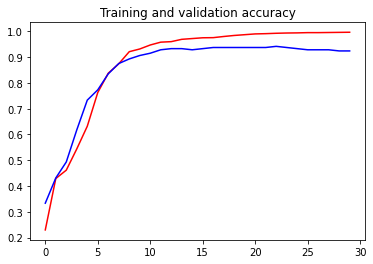

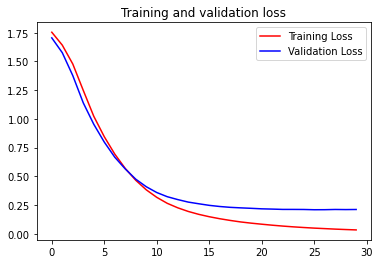

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()